In [1]:
df = pd.read_csv('raw_data/df_grouped_rate.csv',encoding='utf-8' )

In [3]:
df

,year,district,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,s_float_female,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,2015,1000001,CS100001,3.263885e+09,16.5,2,2,1748,211158,145498,...,188530154.0,3889111.0,0.707812,0.318123,0.341417,0.007379,0.344443,0.164275,0.345822,0.120878
1,2015,1000001,CS100002,7.520000e+08,2.0,1,1,1748,211158,145498,...,188530154.0,3889111.0,0.734836,0.340414,0.468521,0.006540,0.447948,0.173301,0.363921,0.008290
2,2015,1000001,CS100003,1.650000e+08,2.0,0,0,1748,211158,145498,...,188530154.0,3889111.0,0.914956,0.321958,0.480098,0.000000,0.524393,0.057219,0.227561,0.182710
3,2015,1000001,CS100004,1.164048e+09,6.0,1,1,1748,211158,145498,...,188530154.0,3889111.0,0.640305,0.418385,0.527128,0.002456,0.382012,0.211828,0.351680,0.051529
4,2015,1000001,CS100005,6.667218e+08,3.5,2,2,1748,211158,145498,...,188530154.0,3889111.0,0.746605,0.469963,0.516867,0.007437,0.466502,0.250264,0.270099,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113260,2019,1001010,CS300008,1.441360e+08,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.881982,0.513650,0.083578,0.108358,0.346493,0.395632,0.149517,0.000000
113261,2019,1001010,CS300009,3.067237e+09,2.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.931167,0.474928,0.128200,0.262188,0.297561,0.325539,0.114712,0.000000
113262,2019,1001010,CS300011,1.794132e+07,1.0,0,1,230,164052,179007,...,154040746.0,3256684.0,0.640979,0.320036,0.046238,0.006346,0.508613,0.275612,0.209429,0.000000
113263,2019,1001010,CS300016,8.942270e+06,3.0,0,0,230,164052,179007,...,154040746.0,3256684.0,0.624137,0.374046,0.322065,0.225009,0.288986,0.227190,0.258815,0.000000


In [5]:
X=df[df.columns[3:]]

In [6]:
y=df["district"]

In [7]:
y

0         1000001
1         1000001
2         1000001
3         1000001
4         1000001
           ...   
113260    1001010
113261    1001010
113262    1001010
113263    1001010
113264    1001010
Name: district, Length: 113265, dtype: int64

In [8]:
y=np.array(y)

In [9]:
X=np.array(X)

In [10]:
len(X)

113265

## T-SNE Visuallization

In [11]:
from sklearn.manifold import TSNE

digits_proj = TSNE(n_components=2).fit_transform(X)

In [6]:
digits_proj

NameError: name 'digits_proj' is not defined

In [3]:
df1= pd.DataFrame(digits_proj)
df2= pd.DataFrame(y)
df1.columns=["x","y"]
df2.columns=["district"]
df3= pd.merge(df2, df1, left_index= True, right_index=True)
df3

NameError: name 'digits_proj' is not defined

In [45]:
df3.columns=["district","x","y"]
df3

,district,x,y
0,1000001,-44.074089,16.572123
1,1000001,6.402270,27.223644
2,1000001,30.783545,-8.308455
3,1000001,47.962097,0.232494
4,1000001,8.670564,35.796104
...,...,...,...
113260,1001010,2.410711,-12.588419
113261,1001010,-43.471561,33.165070
113262,1001010,-43.702209,-5.227225
113263,1001010,-43.254333,0.367240


In [43]:
##df3.to_csv('df3.csv', index=False, encoding='utf-8')

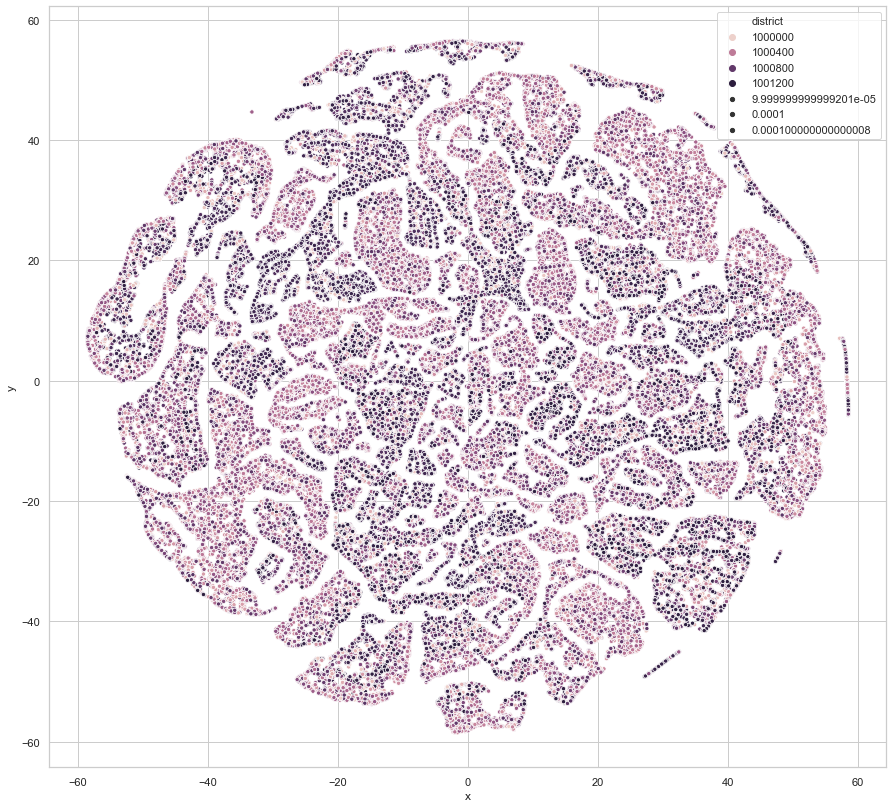

In [57]:
plt.figure(figsize=(15,14))
sns.scatterplot(x='x', 

                y='y', 

                hue='district',

                size=0.0001,

                data=df3)

plt.show()


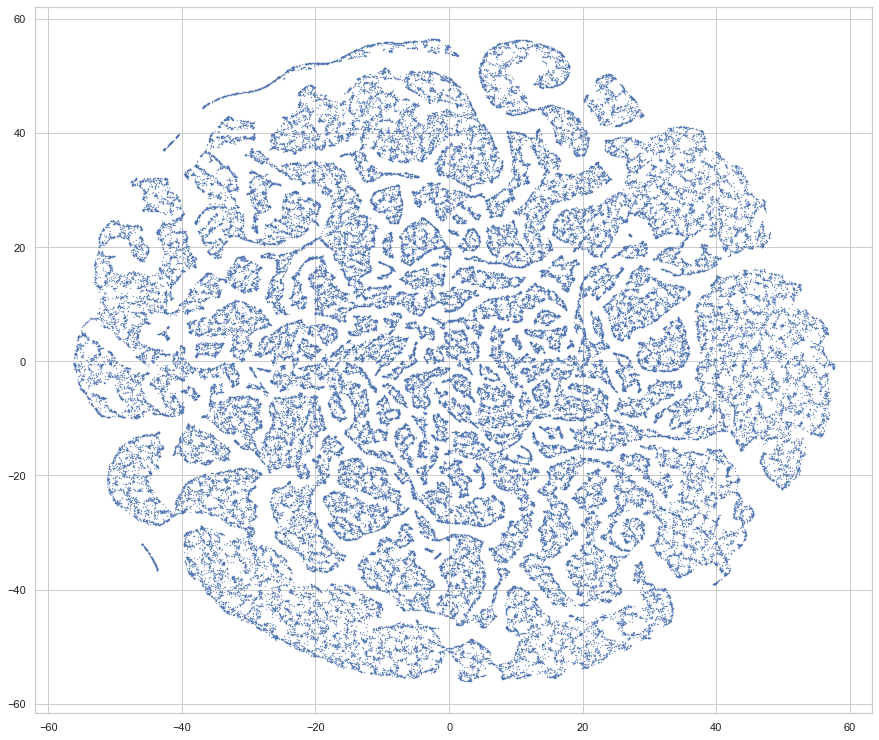

In [20]:
plt.figure(figsize=(15,13))
plt.scatter(digits_proj[:, 0], digits_proj[:, 1],s=0.1 )
plt.show()

## Clustering

In [23]:
## KMEANS
from sklearn.cluster import KMeans
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits_proj)
y_pred = model.labels_
len(np.unique(y_pred))

10

In [28]:
digits_proj[0]

array([-33.018387, -28.586468], dtype=float32)

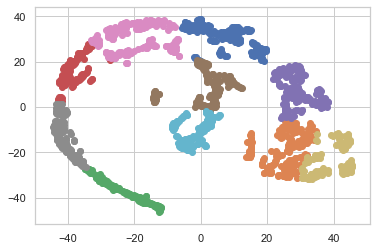

In [31]:
plt.figure()
for idx in np.unique(y_pred):
    mask = y_pred == idx
    plt.scatter(digits_proj[mask, 0], digits_proj[mask, 1])
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [25]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(y, y_pred))
print("AMI:", adjusted_mutual_info_score(y, y_pred))

ARI: 0.02401546173899257
AMI: 0.14861756427959383


In [17]:
X

array([[3.26388534e+09, 1.65000000e+01, 2.00000000e+00, ...,
        1.64275016e-01, 3.45821596e-01, 1.20878394e-01],
       [7.51999998e+08, 2.00000000e+00, 1.00000000e+00, ...,
        1.73301111e-01, 3.63920792e-01, 8.29009843e-03],
       [1.65000002e+08, 2.00000000e+00, 0.00000000e+00, ...,
        5.72191266e-02, 2.27560815e-01, 1.82710477e-01],
       ...,
       [1.79413240e+07, 1.00000000e+00, 0.00000000e+00, ...,
        2.75611878e-01, 2.09428858e-01, 0.00000000e+00],
       [8.94227000e+06, 3.00000000e+00, 0.00000000e+00, ...,
        2.27190076e-01, 2.58815044e-01, 0.00000000e+00],
       [3.68774000e+06, 6.00000000e+00, 0.00000000e+00, ...,
        1.66233791e-01, 7.03896153e-01, 0.00000000e+00]])

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=20, min_samples = 3)
y_pred = model.fit_predict(digits_proj)
len(np.unique(y_pred))

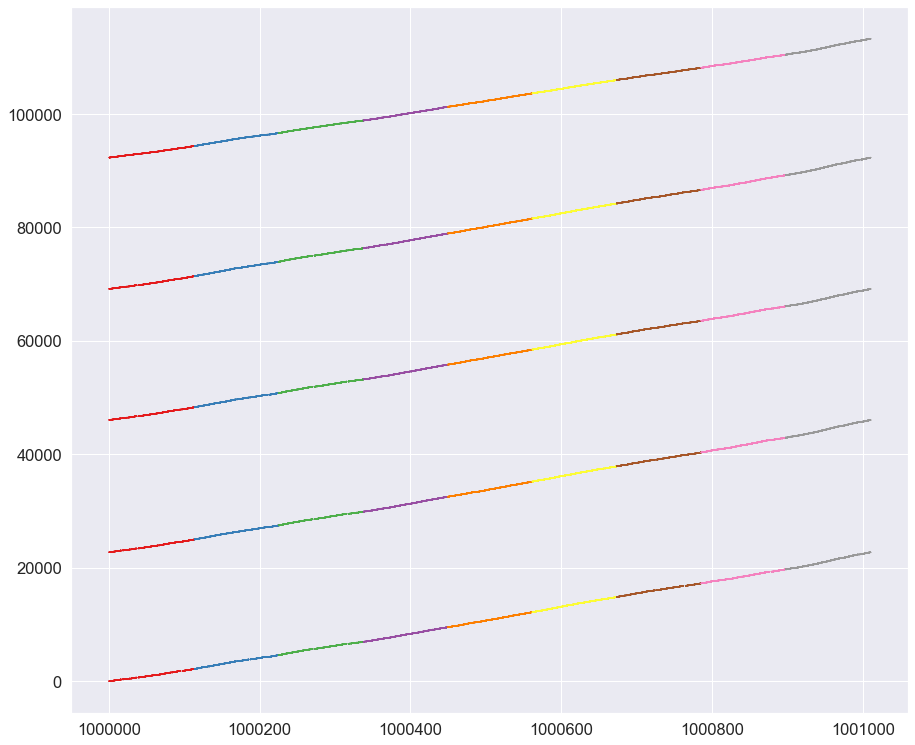

In [94]:
plt.figure(figsize=(15,13))
plt.scatter(y, y_pred,s=0.1 ,c=y, cmap=plt.cm.Set1)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=21, min_samples = 5)
y_pred = model.fit_predict(digits_proj)
len(np.unique(y_pred))